# 数据可视化

## 导入必要的包

In [1]:
#-*- coding : utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
import seaborn as sns

## 导入数据文件

In [2]:
rootDir = r'E:\大学生活\比赛\服务外包\A09-科创-企业画像数据接口'
files = os.listdir(rootDir)
train_files = [i for i in files if 'train' in i]
test_files = [i for i in files if 'verify' in i]

In [3]:
train_files

['base_train_sum.csv',
 'knowledge_train_sum.csv',
 'money_report_train_sum.csv',
 'year_report_train_sum.csv']

In [4]:
base_train = pd.read_csv(os.path.join(rootDir,train_files[0]),encoding='gbk',dtype=object)
knowledge_train = pd.read_csv(os.path.join(rootDir,train_files[1]),encoding='gbk',dtype=object)
money_report_train = pd.read_csv(os.path.join(rootDir,train_files[2]),encoding='gbk',dtype=object)
year_report_train = pd.read_csv(os.path.join(rootDir,train_files[3]),encoding='gbk',dtype=object)


## 查看4个训练集的数据

In [5]:
base_train.head()

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag
0,28,2007,2050,交通运输业,福建,农民专业合作社,企业法人,NaN,1
1,230,2008,3360,服务业,广东,农民专业合作社,企业法人,1,1
2,429,2005,9670,工业,江西,集体所有制企业,自然人,0.75,1
3,693,2011,8360,社区服务,山东,股份有限公司,企业法人,0.98,1
4,727,2001,8720,零售业,江西,股份有限公司,企业法人,0.54,1


In [6]:
knowledge_train.head()

,ID,专利,商标,著作权
0,28,0,1,1
1,230,0,0,0
2,429,1,0,0
3,693,0,0,0
4,727,0,0,0


In [7]:
money_report_train.head()

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
0,28,2015,0,0,0,0,21648,1298.88,0,0
1,230,2015,0,0,0,0,0,0,470.4,28.224
2,429,2015,19340,1547.2,0,0,0,0,0,0
3,693,2015,0,0,0,0,0,0,5350.4,321.024
4,727,2015,0,0,32229.12,1289.1648,0,0,0,0


In [8]:
year_report_train.head()

,ID,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计
0,28,2015,794,16400,28700,72160,28864,7216,-7216,0,-12300
1,230,2015,485,23520,10080,115248,57624,57624,-11524.8,0,13440
2,429,2015,136,193400,183730,502840,351988,NaN,-50284,0,9670
3,693,2015,534,133760,125400,655424,262169.6,196627.2,-65542.4,0,8360
4,727,2015,375,366240,536280,402864,282004.8,161145.6,-40286.4,0,-170040


## 观察离散类数据不同值的个数

In [9]:
for index in base_train.columns:
    if index != 'ID' and index != '注册资本':
        print(index+':')
        print (base_train[index].value_counts())
        print ('\n')

注册时间:
2008    1059
2001    1054
2002    1029
2007    1027
2005    1007
2003    1004
2000    1004
2006     974
2004     972
2013     971
2009     964
2010     964
2011     952
2014     952
2012     946
Name: 注册时间, dtype: int64


行业:
商业服务业    2550
社区服务     2493
服务业      2477
交通运输业    2475
工业       2457
零售业      2455
Name: 行业, dtype: int64


区域:
广西    2203
江西    2186
福建    2160
湖北    2117
山东    2109
广东    2072
湖南    2063
Name: 区域, dtype: int64


企业类型:
农民专业合作社    3043
有限责任公司     3022
股份有限公司     2985
集体所有制企业    2957
合伙企业       2898
Name: 企业类型, dtype: int64


控制人类型:
自然人     7541
企业法人    7342
Name: 控制人类型, dtype: int64


控制人持股比例:
0.73    351
0.54    331
0.8     328
0.98    323
0.81    323
0.93    321
0.85    318
0.57    318
0.62    315
0.91    315
0.83    314
0.52    312
0.75    311
0.72    310
0.63    308
0.53    306
0.84    304
0.92    304
0.82    304
0.87    303
0.68    301
0.59    299
0.94    298
1       298
0.76    298
0.56    297
0.67    295
0.66    295
0.86    294
0.89    294
0.97    29

In [10]:
for index in knowledge_train.columns:
    if index != 'ID':
        print(index+':')
        print (knowledge_train[index].value_counts())
        print ('\n')

专利:
0    9707
1    5192
Name: 专利, dtype: int64


商标:
0    9581
1    5314
Name: 商标, dtype: int64


著作权:
0    9432
1    5479
Name: 著作权, dtype: int64




## 查看训练集每列缺失值个数

In [11]:
base_train.isnull().sum()

ID            0
注册时间        171
注册资本        141
行业          143
区域          140
企业类型        145
控制人类型       167
控制人持股比例     139
flag       9977
dtype: int64

In [12]:
knowledge_train.isnull().sum()

ID       0
专利     151
商标     155
著作权    139
dtype: int64

In [13]:
money_report_train.isnull().sum()

ID               0
year           432
债权融资额度         447
债权融资成本         422
股权融资额度         427
股权融资成本         445
内部融资和贸易融资额度    456
内部融资和贸易融资成本    490
项目融资和政策融资额度    443
项目融资和政策融资成本    478
dtype: int64

In [14]:
year_report_train.isnull().sum()

ID           0
year       451
从业人数       428
资产总额       463
负债总额       445
营业总收入      487
主营业务收入     451
利润总额       429
净利润        484
纳税总额       417
所有者权益合计    429
dtype: int64

## 对knowledge_train_sum.csv中的专利、商标和著作权绘制直方图

In [68]:
def drawBarplot(x,y,xlabel,ylabel,title):
#     定义画直方图函数
    sns.barplot(x,y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for a,b in zip(x,y):
        plt.text(a,b,"%d"%b)

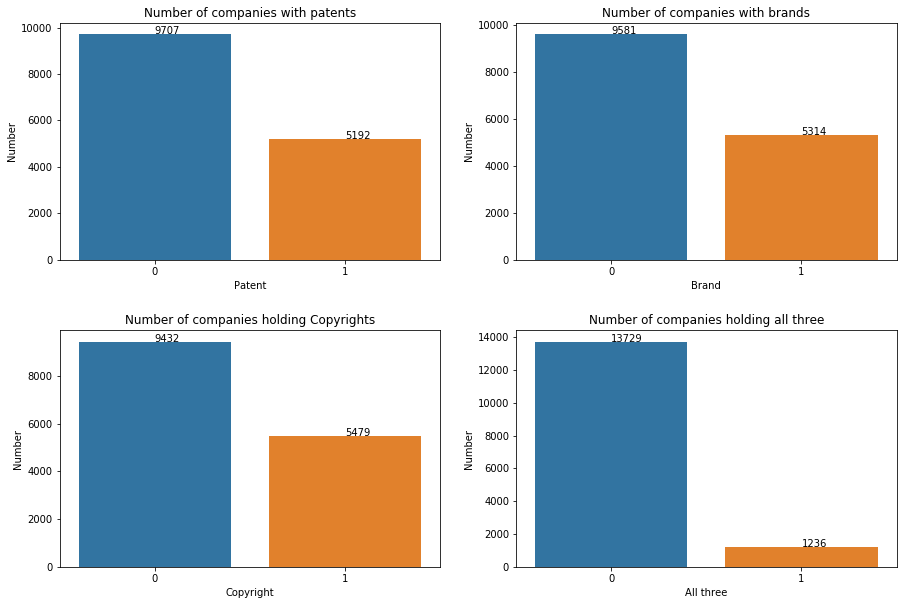

In [77]:
def drawBarplot_knowledge_train():
#     对knowledge_train_sum.csv绘制直方图
    sub = 0
    xlabels = ["Patent","Brand","Copyright"]
    ylabels = ["Number"]*3
    titles = ["Number of companies with patents","Number of companies with brands","Number of companies holding Copyrights"]
    plt.figure(figsize=(15,10))
    plt.subplots_adjust(wspace=0.2,hspace=0.3)
    for column in knowledge_train.columns:
        if column != 'ID':
            x = [0,1]
            y = [knowledge_train[(knowledge_train[column] == '0')].shape[0],knowledge_train[(knowledge_train[column] == '1')].shape[0]]
            plt.subplot(2,2,sub+1)
            drawBarplot(x,y,xlabels[sub],ylabels[sub],titles[sub])
            sub += 1
    plt.subplot(2,2,4)
    x = [0,1]
    y = [knowledge_train[(knowledge_train['专利'] == '0') | (knowledge_train['商标'] == '0') | (knowledge_train['著作权'] == '0')].shape[0],
        knowledge_train[(knowledge_train['专利'] == '1') & (knowledge_train['商标'] == '1') & (knowledge_train['著作权'] == '1')].shape[0]]
    drawBarplot(x,y,"All three","Number","Number of companies holding all three")
    
drawBarplot_knowledge_train()

[1236, 13729]